# 不同插值方法

## 一维插值

### 一维插值定义

一维插值是指在一维空间（即一条直线上）的一组数据点之间进行函数估计的过程。给定一组数据点 $ (x_i, y_i) $，目的是构建一个函数 $ f(x) $，使得对于每个 $ i $，都有 $ f(x_i) = y_i $。

### 一维插值方法比较

| 插值方法        | 描述                           | 优点                         | 缺点                          |
|----------------|--------------------------------|------------------------------|-------------------------------|
| 线性插值       | 在每对相邻点之间进行直线插值   | 实现简单，计算效率高         | 不够平滑，只适用于数据点间隔均匀的情况 |
| 多项式插值     | 通过一个多项式穿过所有数据点   | 精确度高，适用于小规模数据集 | 在数据点多时可能出现过拟合     |
| 三次样条插值(Most Recommended)   | 使用多个三次多项式片段进行插值 | 非常平滑，适用于复杂数据集   | 计算相对复杂                  |
| Hermite插值    | 考虑数据点及其一阶导数         | 平滑性好，适用于已知导数的情况 | 需要额外的导数信息            |


### 一维插值典例及相应处理

#### 典例

1. **天气数据插值**：
   - 数据：一天内不同时间的温度测量值。
   - 目的：预测未测量时间点的温度。
   - 推荐方法：线性插值或三次样条插值，取决于对平滑度的需求。

2. **股票市场数据插值**：
   - 数据：一段时间内的股票价格。
   - 目的：估计在给定时间点的股票价格。
   - 推荐方法：如果需要考虑价格趋势的平滑度，三次样条插值是较好选择。

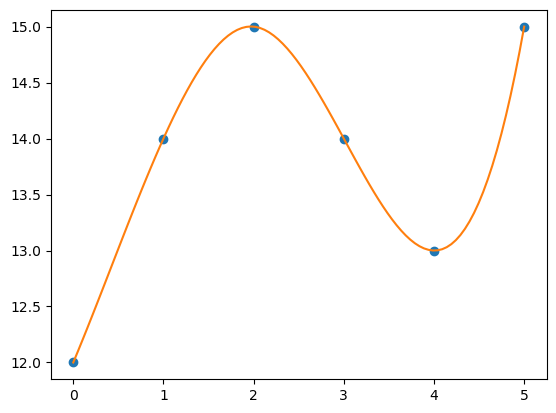

In [16]:
# 三次样条插值
import numpy as np
from scipy.interpolate import interp1d # 导入插值函数，interp1d用于一维插值
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([12, 14, 15, 14, 13, 15])

# 三次样条插值
cubic_interp = interp1d(x, y, kind = 'cubic')

# 生成更细的时间点
xnew = np.linspace(min(x), max(x), 100)
ynew = cubic_interp(xnew)

# 绘制结果
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## 二维插值

### 二维插值定义

二维插值是数学和工程中常用的一种技术，用于从一组离散的点数据中估算出在这些点之间任何位置的值。在二维插值中，我们有一个点集，每个点都有x坐标、y坐标和对应的值（或函数值）。二维插值的目的是创建一个平滑函数，该函数在给定的数据点上与已知值匹配，并且可以用来估计这些点之间任何位置的值。

### 二维插值方法比较

| 插值方法 | 描述 | 优点 | 缺点 |
|-----------|-------|-------|-------|
| **最邻近插值**（Nearest） | 选择最近的数据点并使用其值。 | 计算简单快速，适合处理离散数据。 | 不平滑，在高分辨率下可能显得粗糙和不连续。 |
| **双线性插值**（Linear） | 在两个方向上进行线性插值。 | 比最邻近插值更平滑，计算量适中。 | 在非常不规则的数据中可能出现不连续，不适合高度曲折的数据。 |
| **双三次样条插值**（Spline）| 在每个区间内构造三次多项式进行插值。 | 非常平滑，适合图像处理和其他需要高质量渲染的场景。 | 计算成本较高，可能会在数据不足的区域产生异常值。 |
| **双立方插值**（Cubic） | 用立方多项式进行插值。 | 提供高精度和平滑性，适用于科学计算和图像放大。 | 计算复杂度高，在某些情况下可能产生小的波动或过度平滑的效果。 |

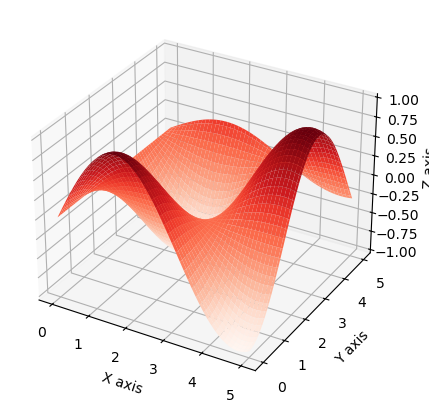

In [33]:
# 二维插值(规则网格插值)
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 导入三维坐标轴支持

# 示例数据
x = np.linspace(0, 5, 10)
y = np.linspace(0, 5, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# 创建插值函数
f = interp2d(x, y, Z, kind = 'cubic') # 三次样条插值

# 使用插值函数
xnew = np.linspace(min(x), max(x), 100)
ynew = np.linspace(min(y), max(y), 100)
Xnew, Ynew = np.meshgrid(xnew, ynew)
Znew = f(xnew, ynew)

# 创建三维坐标系
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d')

# 绘制三维网格图
ax.plot_surface(Xnew, Ynew, Znew, cmap = 'Reds')

# 设置坐标轴标签
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

### 解析二维插值（非规则网格插值）代码

1. **生成非规则分布的数据点**：
    ```python
    np.random.seed(0)
    x = np.random.rand(100)*5
    y = np.random.rand(100)*5
    z = np.sin(x) * np.cos(y)
    ```
    这几行代码生成了一组非规则分布的数据点。`np.random.seed(0)` 设置了随机数生成器的种子，以确保每次运行代码时都生成相同的随机数。`np.random.rand(100)*5` 创建了两个数组 `x` 和 `y`，每个数组包含100个在0到5之间均匀分布的随机数。`z = np.sin(x) * np.cos(y)` 根据 `x` 和 `y` 的值计算出对应的 `z` 值。这样，我们得到了一组非规则分布的三维数据点 `(x, y, z)`。

2. **插值**：
    ```python
    zi = griddata((x, y), z, (xi, yi), method='cubic')
    ```
    这一行使用 `griddata` 函数对非规则数据点 `(x, y, z)` 进行插值。这个函数的输入是一组原始数据点的坐标 `(x, y)` 和对应的值 `z`，以及一个目标网格 `(xi, yi)`，我们想要在这个网格上插值得到 `z` 值。`method='cubic'` 指定使用立方插值方法。函数的结果是 `zi`，它是网格上每个点的插值 `z` 值。

这些代码的目的是生成一组非规则分布的三维数据点 `(x, y, z)`，然后在一个规则的网格上进行立方插值，得到在这个网格上的 `z` 值。这使我们能够在规则网格上绘制原始非规则数据的插值结果。

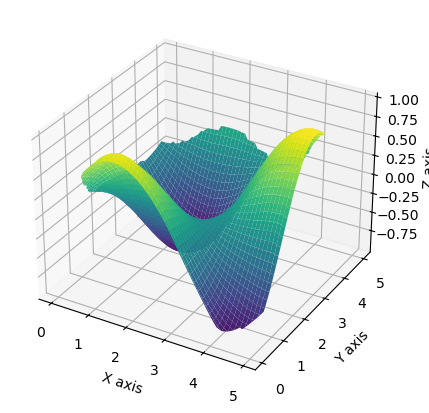

In [36]:
# 二维插值(非规则网格插值)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# 非规则分布的数据点
np.random.seed(0)
x = np.random.rand(100)*5
y = np.random.rand(100)*5
z = np.sin(x) * np.cos(y)

# 创建规则网格来插值
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 插值
zi = griddata((x, y), z, (xi, yi), method = 'cubic')

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(xi, yi, zi, cmap = 'viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Predicted value at x = 2.5 is y = 9.75


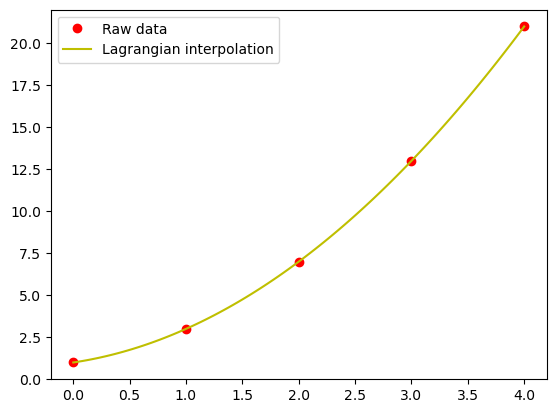

In [20]:
# lagrange插值
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import warnings

warnings.filterwarnings('ignore')

# 已知的点
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 7, 13, 21])

# 使用拉格朗日插值算法
f = lagrange(x, y)

# 为了可视化，我们在一个更细的网格上计算多项式的值
x_fine = np.linspace(min(x), max(x), 100) 
y_fine = f(x_fine)

# 预测x=2.5时的值
x_current = 2.5
y_current = f(x_current)
print('Predicted value at x = 2.5 is y = %.2f' % y_current)

# 绘制结果
plt.plot(x, y, 'ro', label='Raw data')
plt.plot(x_fine, y_fine, 'y-', label='Lagrangian interpolation')
plt.legend()
plt.show()